In [204]:
import numpy as np
import awkward as ak
import uproot
import matplotlib.pyplot as plt
from matplotlib import cm


In [205]:
root_file_dir= '~/Desktop/ROOT_files/'
file1= uproot.open(root_file_dir + 'flat_caf_0-833995dc-14a2-47e7-9a95-91e25102b7ef.root:recTree;29')
file2= uproot.open(root_file_dir + 'flat_caf_1-1637ea75-449f-467f-abd7-9e2f4f9710a7.root:recTree;31')
file3= uproot.open(root_file_dir + 'flat_caf_2-16432aaf-a139-4cb0-8c09-26f5af8c457f.root:recTree;31')
file4= uproot.open(root_file_dir + 'flat_caf_3-1ffa5d5d-a703-4c89-be04-dd5e6d458981.root:recTree;31')
file5= uproot.open(root_file_dir + 'flat_caf_4-d0f08994-a5a3-4420-8600-616832f5adbb.root:recTree;31')

In [206]:
def cut_data(rr, dedx):
    print(ak.count(rr))
    
    rr= ak.flatten(rr)
    dedx= ak.flatten(dedx)

    remove= np.where((rr>25)|(dedx>25)|)
    rr= np.delete(rr, remove)
    dedx= np.delete(dedx, remove)

    return rr.to_numpy(), dedx.to_numpy()

SyntaxError: invalid syntax (737295950.py, line 7)

In [ ]:
rr_1= file1['rec.reco.trk.calo.2.points.rr'].array()
dedx_1= file1['rec.reco.trk.calo.2.points.dedx'].array()
c_mu= file1['rec.reco.trk.chi2pid.2.chi2_muon'].array()
#================================================================================
rr_2= file2['rec.reco.trk.calo.2.points.rr'].array()
dedx_2= file2['rec.reco.trk.calo.2.points.dedx'].array()
#================================================================================  
rr_3= file3['rec.reco.trk.calo.2.points.rr'].array()
dedx_3= file3['rec.reco.trk.calo.2.points.dedx'].array()
#================================================================================
rr_4= file4['rec.reco.trk.calo.2.points.rr'].array()
dedx_4= file4['rec.reco.trk.calo.2.points.dedx'].array()
#================================================================================
rr_5= file5['rec.reco.trk.calo.2.points.rr'].array()
dedx_5= file5['rec.reco.trk.calo.2.points.dedx'].array()

In [ ]:
rr_1, dedx_1= cut_data(rr_1, dedx_1)

h,_,_,_= plt.hist2d(rr_1, dedx_1 ,bins=(100,100), cmax=50)
# for i, val in np.ndenumerate(h):
#     if np.isnan(val):
#         if i[1]<95:
#             h[i]= round(np.random.normal(30,3))
#     if i[1]>=95:
#         h[i]= round(np.random.normal(2,3))

305275
42847


ValueError: while calling

    numpy.bitwise_or.__call__(
        <Array [True, True, True, ..., False, False] type='305275 * bool'>
        <Array [True, True, False, ..., False, False] type='42847 * bool'>
    )

Error details: cannot broadcast RegularArray of size 42847 with RegularArray of size 305275 in bitwise_or

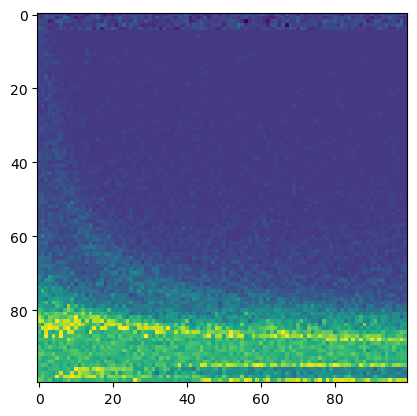

In [ ]:
plt.imshow(np.flip(h.T, axis=0))